In [35]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
from evolution import Evolver
from tqdm import tqdm
import numpy as np


In [38]:
non_point_mutations = {'+' : 1.0,   #single residue insertion
                       '-' : 1.0,   #single residue deletion
                       '*' : 0.4,   #partial duplication
                       '/' : 0.4,   #random insertion 
                       '%' : 0.9,   #partial deletion
                       'p' : 0.1,   #Circular permutation
                       'd' : 0.05   #full duplication    
                       } 

Evolver.non_point_mutations = non_point_mutations
evolver = Evolver('codonrates')

{j:round(i/sum(evolver.evoldict.values()),4) for i, j in zip(evolver.evoldict.values(), evolver.evoldict.keys())}

{'A': 0.0617,
 'C': 0.0308,
 'D': 0.0308,
 'E': 0.0308,
 'F': 0.0308,
 'G': 0.0617,
 'H': 0.0308,
 'I': 0.0463,
 'K': 0.0308,
 'L': 0.0925,
 'M': 0.0154,
 'N': 0.0308,
 'P': 0.0617,
 'Q': 0.0308,
 'R': 0.0925,
 'S': 0.0925,
 'T': 0.0617,
 'V': 0.0617,
 'W': 0.0154,
 'Y': 0.0308,
 '+': 0.0154,
 '-': 0.0154,
 '*': 0.0062,
 '/': 0.0062,
 '%': 0.0139,
 'p': 0.0015,
 'd': 0.0008}

100%|██████████| 300/300 [00:04<00:00, 71.68it/s]


Text(0, 0.5, 'Density')

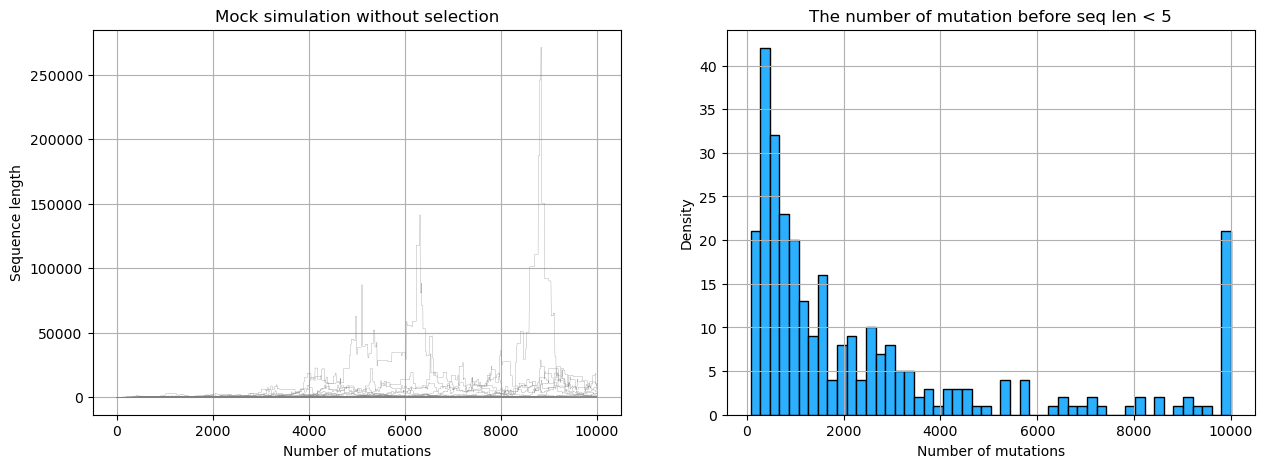

In [37]:
def ratetest(l):
    seq = "A" * l
    x = [1]
    for i in range(10000):
        seq = evolver.mutate(seq)[0]
        x.append(len(seq))
        if len(seq) < 6:
            #print(f'too short after {i} steps')
            break
    return x , len(x)


n_cycles = []
len_xs = []
xs = []
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)


for i in tqdm(range(300)):
    x, len_x = ratetest(24)
    n_cycles.append(len_x)
    xs.append(x)
    len_xs = [len(x)]
    ax[0].plot(x, '-', color='grey', linewidth=0.2)
    ax[0].grid(True, which="both")
#ax[0].set_ylim([0,500])
ax[1].hist(n_cycles, bins=50, facecolor = '#2ab0ff', edgecolor='black', linewidth=1)
ax[1].grid(True, which="both")


ax[0].set_title('Mock simulation without selection')
ax[1].set_title('The number of mutation before seq len < 5')
ax[0].set_xlabel('Number of mutations')
ax[1].set_xlabel('Number of mutations')
ax[0].set_ylabel('Sequence length')
ax[1].set_ylabel('Density')




you can use this https://academic.oup.com/gbe/article/5/3/514/582828
or
calculate it again using Igor's data


In [5]:
import pandas as pd
import sys
sys.path.append('../')
from evolution import Evolver

evolver = Evolver('codonrates')
df = pd.DataFrame({'sequence':['A1','A2','A3','A4','A5'] , 'score': [10] * 5})
df2 = pd.DataFrame({'sequence':['B'] * 5, 'score': [5] * 5})


(array([1.09903094e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.29709282e-04, 2.19806188e-04, 1.09903094e-04,
        0.00000000e+00, 2.19806188e-04, 6.59418563e-04, 5.49515469e-04,
        1.53864331e-03, 1.42874022e-03, 1.09903094e-03, 1.64854641e-03,
        4.06641447e-03, 4.83573613e-03, 5.16544541e-03, 7.25360420e-03,
        1.00011815e-02, 1.31883713e-02, 1.43973053e-02, 1.96726538e-02,
        2.30796497e-02, 2.82450951e-02, 3.54986993e-02, 4.18730788e-02,
        5.33030005e-02, 6.35239883e-02, 7.16568172e-02, 9.06700525e-02,
        9.39671453e-02, 1.19684469e-01, 1.37268964e-01, 1.51556366e-01,
        1.70020086e-01, 1.89472934e-01, 2.15300161e-01, 2.25411246e-01,
        2.71130933e-01, 2.81132114e-01, 2.97507675e-01, 3.28830057e-01,
        3.41468913e-01, 3.58064280e-01, 3.81034027e-01, 3.76747806e-01,
        4.03234451e-01, 3.88507437e-01, 3.98728425e-01, 3.99607649e-01,
        3.92903561e-01, 3.87298503e-01, 3.75099259e-01, 3.715823

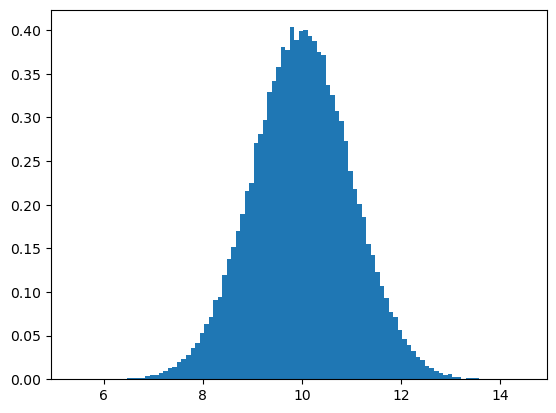

In [8]:
plt.hist(np.random.normal(loc=10, scale=1.0, size=100000), bins=100, density=True)

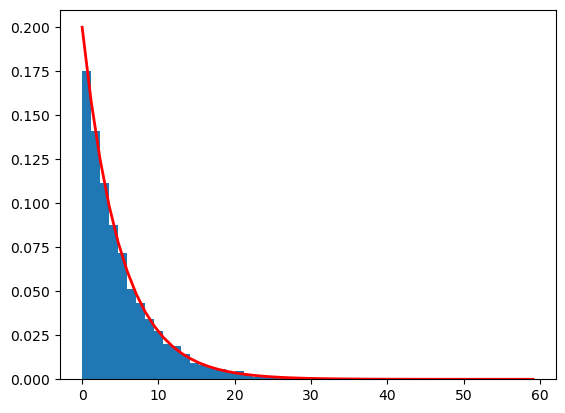

In [9]:
import matplotlib.pyplot as plt
import scipy.special as sps  

shape, scale = 1, 5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()


(array([ 23.,  68.,  99., 174., 210., 242., 260., 329., 338., 332., 392.,
        330., 362., 382., 369., 393., 322., 339., 355., 294., 283., 258.,
        270., 242., 249., 208., 195., 211., 216., 174., 188., 156., 132.,
        123., 137.,  94., 121.,  95.,  74.,  83.,  76.,  74.,  52.,  47.,
         55.,  60.,  50.,  51.,  32.,  35.,  37.,  34.,  27.,  15.,  24.,
         16.,  18.,  11.,  15.,  10.,  10.,  15.,  11.,   8.,  12.,   9.,
          2.,  13.,   5.,   7.,   4.,   5.,   5.,   2.,   3.,   2.,   4.,
          3.,   2.,   0.,   3.,   0.,   0.,   2.,   3.,   0.,   1.,   1.,
          1.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.12575679,  0.71778624,  1.30981569,  1.90184513,  2.49387458,
         3.08590403,  3.67793348,  4.26996293,  4.86199238,  5.45402183,
         6.04605127,  6.63808072,  7.23011017,  7.82213962,  8.41416907,
         9.00619852,  9.59822796, 10.19025741, 10.78228686, 11.37431631,
        11.96634576, 12.55

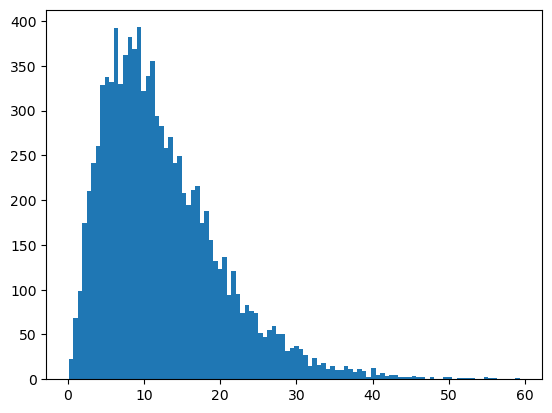

In [10]:
s = np.random.gamma(2.5, 5, 10000)
plt.hist(s, 100)